In [18]:
import dask.dataframe
import pandas as pd
import numpy as np
import tqdm.notebook as tqdm

In [2]:
%time standardized_form = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
%time stand_fn = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
%time data = dask.dataframe.multi.concat([standardized_form, stand_fn], axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)
%time data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()

CPU times: user 47.8 s, sys: 39.7 s, total: 1min 27s
Wall time: 1min 56s
CPU times: user 53.3 ms, sys: 3.23 ms, total: 56.6 ms
Wall time: 113 ms
CPU times: user 99 ms, sys: 0 ns, total: 99 ms
Wall time: 98.5 ms
CPU times: user 22.5 ms, sys: 0 ns, total: 22.5 ms
Wall time: 22.3 ms
CPU times: user 2min 34s, sys: 1min 40s, total: 4min 14s
Wall time: 2min 43s


In [3]:
labels_l1 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/KMeans10GB.pq")
labels_l2_9 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_cl9_labels.pq")
labels_l2_2 = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/subclustering_cluster2_k3.pq")
labels = labels_l1.copy()
labels.loc[labels.kmeans10gb == 9, 'kmeans10gb'] = labels_l2_9['9'].values + 90
labels.loc[labels.kmeans10gb == 2, 'kmeans10gb'] = labels_l2_2['subclustering_cluster2_k3'].values + 20

In [4]:
outliers = [98, 93, 96, 97]
mask = ~labels.kmeans10gb.isin(outliers)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
data.columns[:10]

Index(['sdbAre_q1', 'sdbAre_q2', 'sdbAre_q3', 'sdbPer_q1', 'sdbPer_q2',
       'sdbPer_q3', 'sdbCoA_q1', 'sdbCoA_q2', 'sdbCoA_q3', 'ssbCCo_q1'],
      dtype='object')

In [38]:
dummies = pd.get_dummies(labels.astype('str'))

In [12]:
%%time
model = ols("sdbAre_q1 ~ labels", data=data.assign(labels=pd.Categorical(labels)))

ValueError: Length of values (1) does not match length of index (14539578)

In [40]:
%%time
model = sm.OLS(data["sdbAre_q1"], dummies).fit()

CPU times: user 1min 2s, sys: 1min 2s, total: 2min 5s
Wall time: 23.7 s


In [41]:
p = model.f_pvalue
f = model.fvalue

In [49]:
%%time
results = {}
for c in tqdm.tqdm(data.columns, total=328):
    model = sm.OLS(data[c], dummies).fit()
    results[c] = (model.f_pvalue, model.fvalue)
results_df = pd.DataFrame(results).T
results_df.columns = ["p", "F"]
results_df.to_parquet("../../urbangrammar_samba/spatial_signatures/f_stats.pq")

  0%|          | 0/328 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1827: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid


CPU times: user 5h 51min 10s, sys: 5h 52min 9s, total: 11h 43min 20s
Wall time: 2h 11min 46s


In [57]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, sdbAre_q1 to Code_18_521_q3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p       310 non-null    float64
 1   F       310 non-null    float64
dtypes: float64(2)
memory usage: 15.8+ KB


In [78]:
data.shape

(14539578, 328)

In [80]:
results_df[results_df.p > 0.05].index

Index(['Code_18_141_q1', 'Code_18_122_q2', 'Code_18_512_q2', 'Code_18_324_q1',
       'Code_18_312_q1'],
      dtype='object')

In [ ]:
Land cover [Green urban areas] (Q1), Land cover [Road and rail networks and associated land] (Q2), 

In [81]:
key = { 
    '124': 'Land cover [Airports]',
    '211': 'Land cover [Non-irrigated arable land]',
    '121': 'Land cover [Industrial or commercial units]',
    '421': 'Land cover [Salt marshes]',
    '522': 'Land cover [Estuaries]',
    '142': 'Land cover [Sport and leisure facilities]',
    '141': 'Land cover [Green urban areas]',
    '112': 'Land cover [Discontinuous urban fabric]',
    '231': 'Land cover [Pastures]',
    '311': 'Land cover [Broad-leaved forest]',
    '131': 'Land cover [Mineral extraction sites]',
    '123': 'Land cover [Port areas]',
    '122': 'Land cover [Road and rail networks and associated land]',
    '512': 'Land cover [Water bodies]',
    '243': 'Land cover [Land principally occupied by agriculture, with significant areas of natural vegetation]',
    '313': 'Land cover [Mixed forest]',
    '412': 'Land cover [Peat bogs]',
    '321': 'Land cover [Natural grasslands]',
    '322': 'Land cover [Moors and heathland]',
    '324': 'Land cover [Transitional woodland-shrub]',
    '111': 'Land cover [Continuous urban fabric]',
    '423': 'Land cover [Intertidal flats]',
    '523': 'Land cover [Sea and ocean]',
    '312': 'Land cover [Coniferous forest]',
    '133': 'Land cover [Construction sites]',
    '333': 'Land cover [Sparsely vegetated areas]',
    '332': 'Land cover [Bare rocks]',
    '411': 'Land cover [Inland marshes]',
    '132': 'Land cover [Dump sites]',
    '222': 'Land cover [Fruit trees and berry plantations]',
    '242': 'Land cover [Complex cultivation patterns]',
    '331': 'Land cover [Beaches, dunes, sands]',
    '511': 'Land cover [Water courses]',
    '334': 'Land cover [Burnt areas]',
    '244': 'Land cover [Agro-forestry areas]',
    '521': 'Land cover [Coastal lagoons]',
}

In [86]:
s = ""
for ch in results_df[results_df.p.isna()].index:
    s += f"{key[ch[8:11]]} {ch[12:].upper()}, "
s

'Land cover [Airports] Q1, Land cover [Mineral extraction sites] Q1, Land cover [Road and rail networks and associated land] Q1, Land cover [Water bodies] Q1, Land cover [Inland marshes] Q1, Land cover [Dump sites] Q1, Land cover [Water courses] Q2, Land cover [Burnt areas] Q2, Land cover [Water courses] Q1, Land cover [Burnt areas] Q1, Land cover [Agro-forestry areas] Q3, Land cover [Coastal lagoons] Q2, Land cover [Burnt areas] Q3, Land cover [Agro-forestry areas] Q1, Land cover [Agro-forestry areas] Q2, Land cover [Dump sites] Q2, Land cover [Coastal lagoons] Q1, Land cover [Coastal lagoons] Q3, '

In [54]:
results_df.p.isna().sum()

18

<AxesSubplot:ylabel='Frequency'>

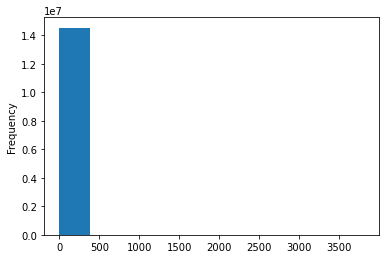

In [ ]:
data["Code_18_141_q1"].plot.hist()

In [48]:
for char in results_df[results_df.isna().any(axis=1)].index:
    assert data[char].min() == 0
    assert data[char].max() == 0

In [58]:
results_df["F"]

sdbAre_q1         1.164105e+06
sdbAre_q2         2.713511e+06
sdbAre_q3         2.829579e+06
sdbPer_q1         9.943499e+05
sdbPer_q2         2.135257e+06
                      ...     
Code_18_132_q2             NaN
Code_18_132_q3    5.033400e+00
Code_18_521_q1             NaN
Code_18_222_q2    1.679105e+02
Code_18_521_q3             NaN
Name: F, Length: 328, dtype: float64

In [60]:
importance = pd.read_csv("../../urbangrammar_samba/spatial_signatures/clustering_data/spsig_feature_importance.csv", index_col=0)

In [61]:
importance

,0
sicCAR_q1,0.036944
sicCAR_q2,0.031717
mtcWNe_q2,0.023476
ltbIBD_q2,0.016662
sdcAre_q3,0.016005
...,...
Code_18_334_q2,0.000000
Code_18_141_q1,0.000000
Code_18_124_q1,0.000000
Code_18_511_q2,0.000000


In [63]:
results_df["importance"] = importance['0']

<AxesSubplot:xlabel='F', ylabel='importance'>

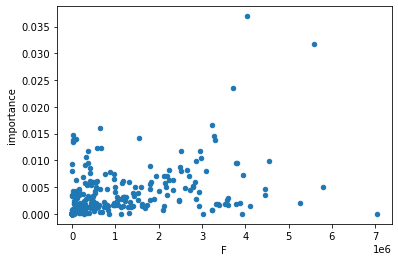

In [65]:
results_df.plot.scatter("F", "importance")

In [66]:
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F', ylabel='importance'>

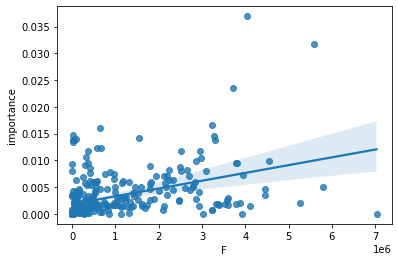

In [67]:
sns.regplot("F", "importance", data=results_df)

In [70]:
results_df["sig"] = results_df.p < 0.05

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sig', ylabel='importance'>

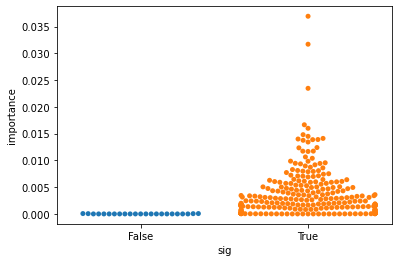

In [71]:
sns.swarmplot(y="importance", x='sig', data=results_df)

In [77]:
results_df.query('sig').sort_values("F", ascending=False).head(20)

,p,F,importance,sig
ssbCor_q1,0.0,7.031875e+06,1.004750e-07,True
ssbCCD_q2,0.0,5.784977e+06,4.943006e-03,True
sicCAR_q2,0.0,5.586707e+06,3.171676e-02,True
ssbSqu_q1,0.0,5.260049e+06,2.004136e-03,True
sdsSPO_q2,0.0,4.555403e+06,9.863778e-03,True
ssbCCD_q3,0.0,4.464720e+06,3.564785e-03,True
sdsSPO_q1,0.0,4.453836e+06,4.645283e-03,True
"R, S, T, U. Other_q2",0.0,4.113209e+06,1.432705e-03,True
sicCAR_q1,0.0,4.039581e+06,3.694416e-02,True
ssbERI_q1,0.0,3.946964e+06,7.240188e-03,True
